In [4]:
import tensorflow as tf
from tensorflow.keras import Sequential

In [9]:
from tensorflow.keras.layers import Flatten, Dense, Dropout, BatchNormalization, Conv2D, MaxPool2D

In [10]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image

In [11]:
print(tf.__version__)

2.16.1


In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [14]:
data = pd.read_csv('E:/Research/Acne Detection System/model1/augmented_data.csv')
data.shape

(1332, 7)

In [15]:
data.head()

,filename,blackheads,dark spot,nodules,papules,pustules,whiteheads
0,img_0.jpg,1,0,0,1,1,0
1,img_1.jpg,0,1,0,1,1,0
2,img_2.jpg,0,0,0,1,0,0
3,img_3.jpg,0,1,0,1,0,0
4,img_4.jpg,0,1,0,0,1,0


In [16]:
img_width = 350
img_height = 350

X = []

for i in tqdm(range(data.shape[0])):
    path = 'E:/Research/Acne Detection System/model1/data/' + data['filename'][i]  # Remove extra .jpg
    img = image.load_img(path, target_size=(img_width, img_height))
    img = image.img_to_array(img)
    img = img / 255.0  # Normalize the image
    X.append(img)

X = np.array(X)  # Convert the list to a NumPy array after the loop

100%|██████████| 1332/1332 [00:23<00:00, 55.87it/s]


In [17]:
X.shape

(1332, 350, 350, 3)

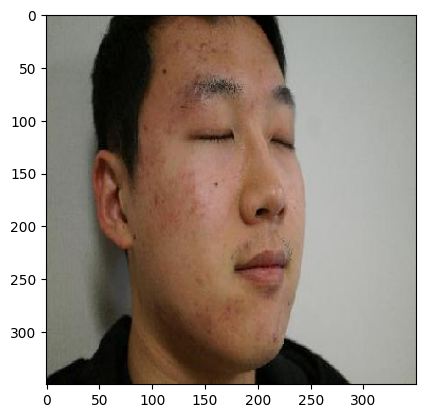

In [18]:
plt.imshow(X[2])

In [19]:
print(data.columns)

Index(['filename', ' blackheads', ' dark spot', ' nodules', ' papules',
       ' pustules', ' whiteheads'],
      dtype='object')


In [20]:
data.columns = data.columns.str.strip()

In [21]:
print(data.columns)

Index(['filename', 'blackheads', 'dark spot', 'nodules', 'papules', 'pustules',
       'whiteheads'],
      dtype='object')


In [22]:
# If you see that the column has more than one space, you can rename it
data.columns = data.columns.str.replace('  ', ' ')  # Replace double spaces with a single space

In [24]:
data['nodules'][20]

0

In [25]:
y = data.drop(['filename'] , axis =1)
y = y.to_numpy()
y.shape

(1332, 6)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.15) 

In [27]:
model= Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape = X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.2))

model.add(Conv2D(32,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(64,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.5))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(6,activation='sigmoid'))


C:\Users\DEVINDI\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 348, 348, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 348, 348, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 174, 174, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 172, 172, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 172, 172, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 86, 86, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 84, 84, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 84, 84, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 42, 42, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 40, 40, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 40, 40, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,553,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,653,414 (25.38 MB)

 Trainable params: 6,652,678 (25.38 MB)

 Non-trainable params: 736 (2.88 KB)

In [29]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(X_train,y_train, epochs=100,validation_data=(X_test ,y_test))

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.2003 - loss: 0.8704 - val_accuracy: 0.2300 - val_loss: 5.5874
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 123s 3s/step - accuracy: 0.2651 - loss: 0.7249 - val_accuracy: 0.2300 - val_loss: 12.6079
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.3267 - loss: 0.6506 - val_accuracy: 0.2300 - val_loss: 22.7552
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 121s 3s/step - accuracy: 0.3420 - loss: 0.6214 - val_accuracy: 0.2300 - val_loss: 31.7565
Epoch 5/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 128s 4s/step - accuracy: 0.3486 - loss: 0.5867 - val_accuracy: 0.2300 - val_loss: 24.6637
Epoch 6/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 118s 3s/step - accuracy: 0.3733 - loss: 0.5634 - val_accuracy: 0.2300 - val_loss: 19.1678
Epoch 7/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 116s 3s/step - accuracy: 0.4224 - loss: 0.5471 - val_accuracy: 0.2300 - val_loss: 13.0863
Epoch 8/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 112s 3s/step - accuracy: 0.3782 - loss: 0.5296 - val_accura

In [31]:
def plot_learningCurve(history,epoch):
    epoch_range = range(1,epoch+1)
    plt.plot(epoch_range, history.history['accuracy'])
    plt.plot(epoch_range, history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'], loc='upper left')
    plt.show()

    plt.plot(epoch_range, history.history['loss'])
    plt.plot(epoch_range, history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train','val'], loc='upper left')
    plt.show()

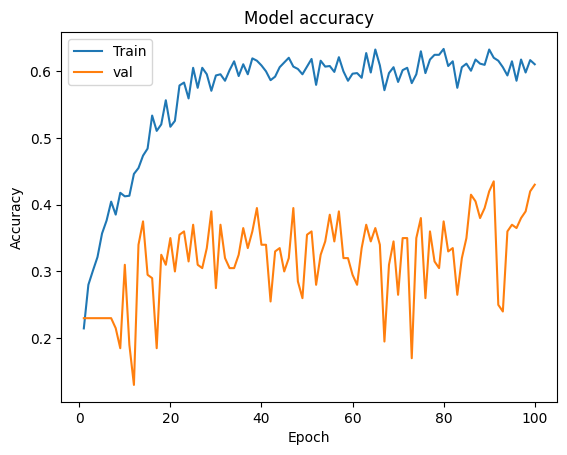

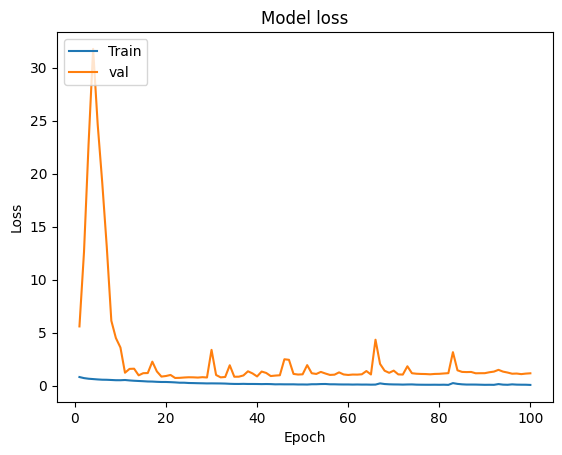

In [32]:
plot_learningCurve(history ,100)

Index(['blackheads', 'dark spot', 'nodules', 'papules', 'pustules',
       'whiteheads'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
Top 3 predictions:
blackheads: 0.9936243295669556
pustules: 0.9879626631736755
papules: 0.9876686930656433


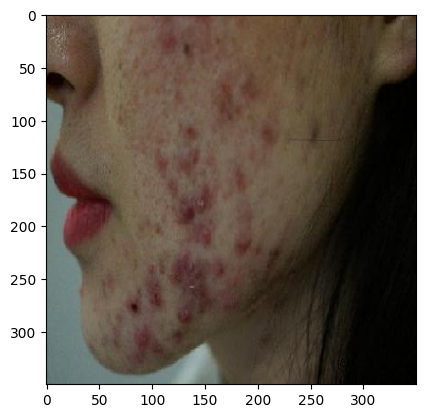

In [33]:
img = image.load_img('img_0.jpg', target_size=(img_width, img_height))
plt.imshow(img)
img = image.img_to_array(img)
img = img / 255.0  

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[1:]
print(classes)

# Get the predicted probabilities
y_prob = model.predict(img)

# Sort the probabilities and get the top 3 class indices
top3 = np.argsort(y_prob[0])[:-4:-1]  # Use indexing instead of calling y_prob

# Display the top 3 predicted classes
print("Top 3 predictions:")
for i in top3:
    print(f"{classes[i]}: {y_prob[0][i]}")

Index(['blackheads', 'dark spot', 'nodules', 'papules', 'pustules',
       'whiteheads'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Top 3 predictions:
dark spot: 0.9997574090957642
papules: 0.9993366599082947
pustules: 0.0001942374074133113


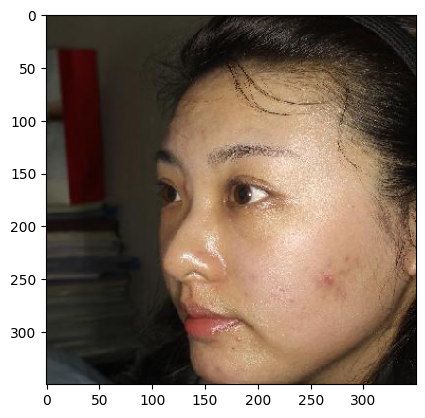

In [34]:
img = image.load_img('img_3.jpg', target_size=(img_width, img_height))
plt.imshow(img)
img = image.img_to_array(img)
img = img / 255.0  

img = img.reshape(1, img_width, img_height, 3)

classes = data.columns[1:]
print(classes)

# Get the predicted probabilities
y_prob = model.predict(img)

# Sort the probabilities and get the top 3 class indices
top3 = np.argsort(y_prob[0])[:-4:-1]  # Use indexing instead of calling y_prob

# Display the top 3 predicted classes
print("Top 3 predictions:")
for i in top3:
    print(f"{classes[i]}: {y_prob[0][i]}")

Class labels: Index(['blackheads', 'dark spot', 'nodules', 'papules', 'pustules',
       'whiteheads'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Top 3 predictions:
pustules: 0.9821
nodules: 0.2157
blackheads: 0.0020


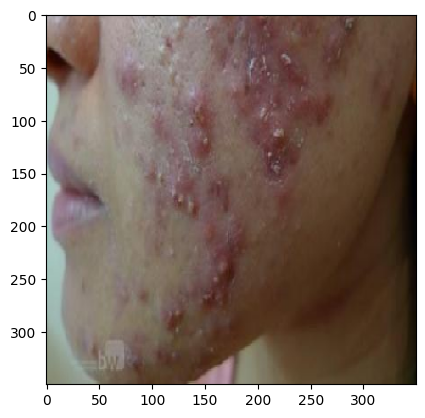

In [39]:
# Assuming img_width and img_height are defined
img = image.load_img('img_15.jpg', target_size=(img_width, img_height))
plt.imshow(img)
img = image.img_to_array(img)
img = img / 255.0  

# Reshape for model input
img = img.reshape(1, img_width, img_height, 3)

# Ensure 'data' DataFrame is already loaded and columns[1:] are the class names
classes = data.columns[1:]
print("Class labels:", classes)

# Predict probabilities
y_prob = model.predict(img)

# Get the indices of the top 3 predictions
top3 = np.argsort(y_prob[0])[-3:][::-1]  # Sort and reverse to get the top 3 classes

# Display the top 3 predicted classes and their probabilities
print("Top 3 predictions:")
for i in top3:
    print(f"{classes[i]}: {y_prob[0][i]:.4f}")

Class labels: Index(['blackheads', 'dark spot', 'nodules', 'papules', 'pustules',
       'whiteheads'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Top 3 predictions:
papules: 0.9957
dark spot: 0.9898
blackheads: 0.9895


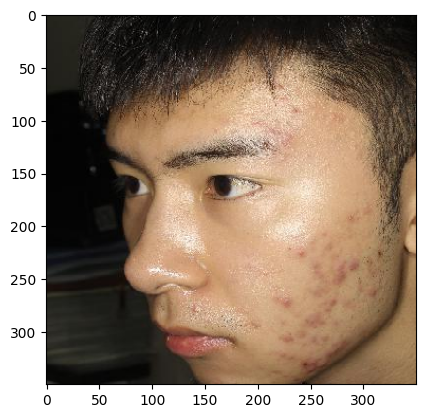

In [40]:
# Assuming img_width and img_height are defined
img = image.load_img('img_42.jpg', target_size=(img_width, img_height))
plt.imshow(img)
img = image.img_to_array(img)
img = img / 255.0  

# Reshape for model input
img = img.reshape(1, img_width, img_height, 3)

# Ensure 'data' DataFrame is already loaded and columns[1:] are the class names
classes = data.columns[1:]
print("Class labels:", classes)

# Predict probabilities
y_prob = model.predict(img)

# Get the indices of the top 3 predictions
top3 = np.argsort(y_prob[0])[-3:][::-1]  # Sort and reverse to get the top 3 classes

# Display the top 3 predicted classes and their probabilities
print("Top 3 predictions:")
for i in top3:
    print(f"{classes[i]}: {y_prob[0][i]:.4f}")

Class labels: Index(['blackheads', 'dark spot', 'nodules', 'papules', 'pustules',
       'whiteheads'],
      dtype='object')
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Top 3 predictions:
dark spot: 0.9998
whiteheads: 0.0242
blackheads: 0.0022


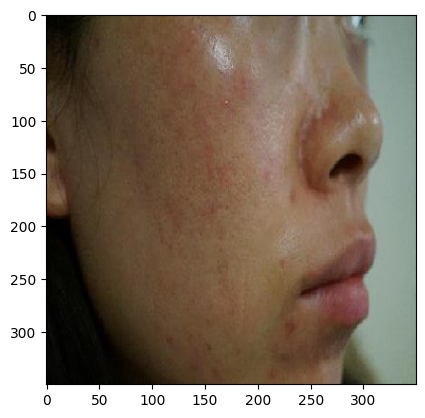

In [41]:
# Assuming img_width and img_height are defined
img = image.load_img('img_30.jpg', target_size=(img_width, img_height))
plt.imshow(img)
img = image.img_to_array(img)
img = img / 255.0  

# Reshape for model input
img = img.reshape(1, img_width, img_height, 3)

# Ensure 'data' DataFrame is already loaded and columns[1:] are the class names
classes = data.columns[1:]
print("Class labels:", classes)

# Predict probabilities
y_prob = model.predict(img)

# Get the indices of the top 3 predictions
top3 = np.argsort(y_prob[0])[-3:][::-1]  # Sort and reverse to get the top 3 classes

# Display the top 3 predicted classes and their probabilities
print("Top 3 predictions:")
for i in top3:
    print(f"{classes[i]}: {y_prob[0][i]:.4f}")

In [ ]:
# Save the model in the Keras format
model.save('E:/Research/Acne Detection System/model1/acne_classification_mode2.keras')

In [6]:
# Load the model in Keras format
loaded_model = tf.keras.models.load_model('E:/Research/Acne Detection System/model1/acne_classification_model.keras')